## Task - Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [42]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv("bank.csv")

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
# checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
# checking the number of rows and columns
df.shape

(4521, 17)

In [11]:
# checking the count of null 
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Summay of data

### Categorical Variables :
- job      : admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student
- marital  : married, single, divorced
- education: secondary, tertiary, primary, unknown
- default  : yes, no
- housing  : yes, no
- loan     : yes, no 
- deposit  : yes, no (Dependent Variable)
- contact  : unknown, cellular, telephone
- month    : jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec 
- poutcome: unknown, other, failure, success

### Numerical Variables:
- age 
- balance
- day
- duration
- campaign
- pdays
- previous 

## Feature Engineering

In [14]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [15]:
# Combine similar jobs into categiroes
df['job'] = df['job'].replace(['management', 'admin.'], 'white-collar')
df['job'] = df['job'].replace(['services','housemaid'], 'pink-collar')
df['job'] = df['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [18]:
df.job.value_counts()

white-collar     1447
blue-collar       946
technician        768
pink-collar       529
other             480
self-employed     183
entrepreneur      168
Name: job, dtype: int64

In [19]:
df.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [21]:
# Combine 'unknown' and 'other'
df['poutcome'] = df['poutcome'].replace(['other'] , 'unknown')
df.poutcome.value_counts()

unknown    3902
failure     490
success     129
Name: poutcome, dtype: int64

In [23]:
# Drop 'contact', as every participant has been contacted. 
df.drop('contact', axis=1, inplace=True)

In [24]:
# values for "default" : yes/no
df["default"]
df['default_cat'] = df['default'].map( {'yes':1, 'no':0} )
df.drop('default', axis=1,inplace = True)

In [34]:
# Encode categorical features (replace with appropriate encoding if needed)
categorical_features = [
    "job",
    "marital",
    "education",
    "housing",
    "loan",
    "day",
    "month",
    "poutcome"
]
encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])


In [35]:
df.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,default_cat
0,30,2,1,0,1787,0,0,18,10,79,1,-1,0,2,no,0
1,33,3,1,1,4789,1,1,10,8,220,1,339,4,0,no,0
2,35,6,2,2,1350,1,0,15,0,185,1,330,1,0,no,0
3,30,6,1,2,1476,1,1,2,6,199,4,-1,0,2,no,0
4,59,0,1,1,0,1,0,4,8,226,1,-1,0,2,no,0


## Data Visualization

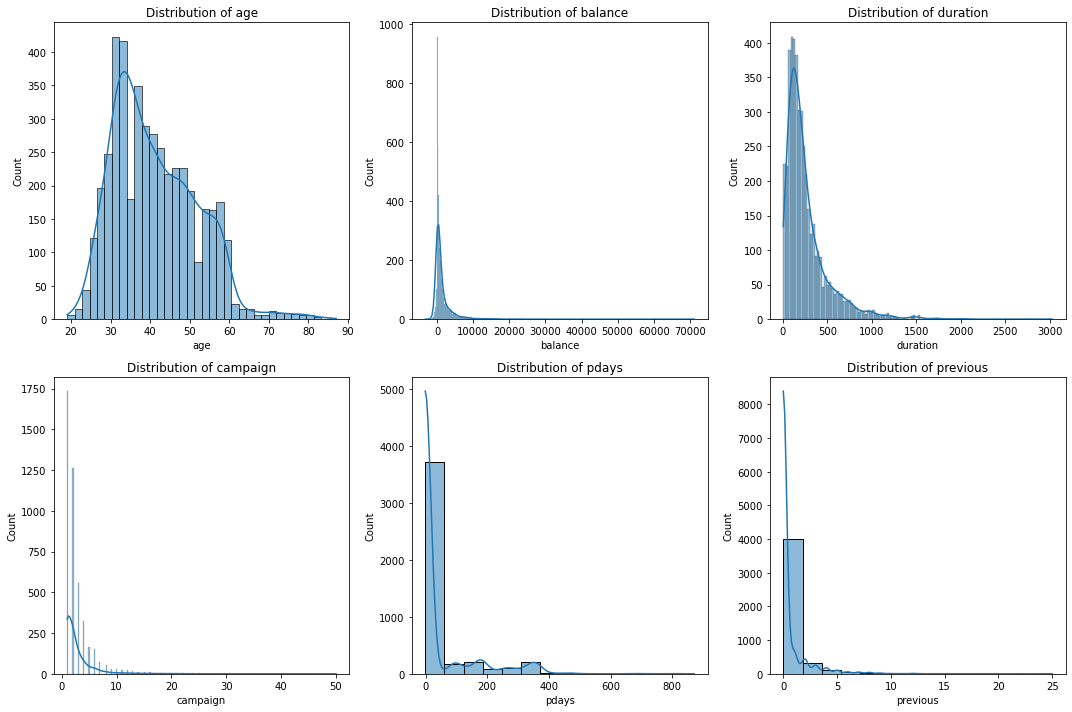

In [48]:
# Summary statistics for numerical features
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

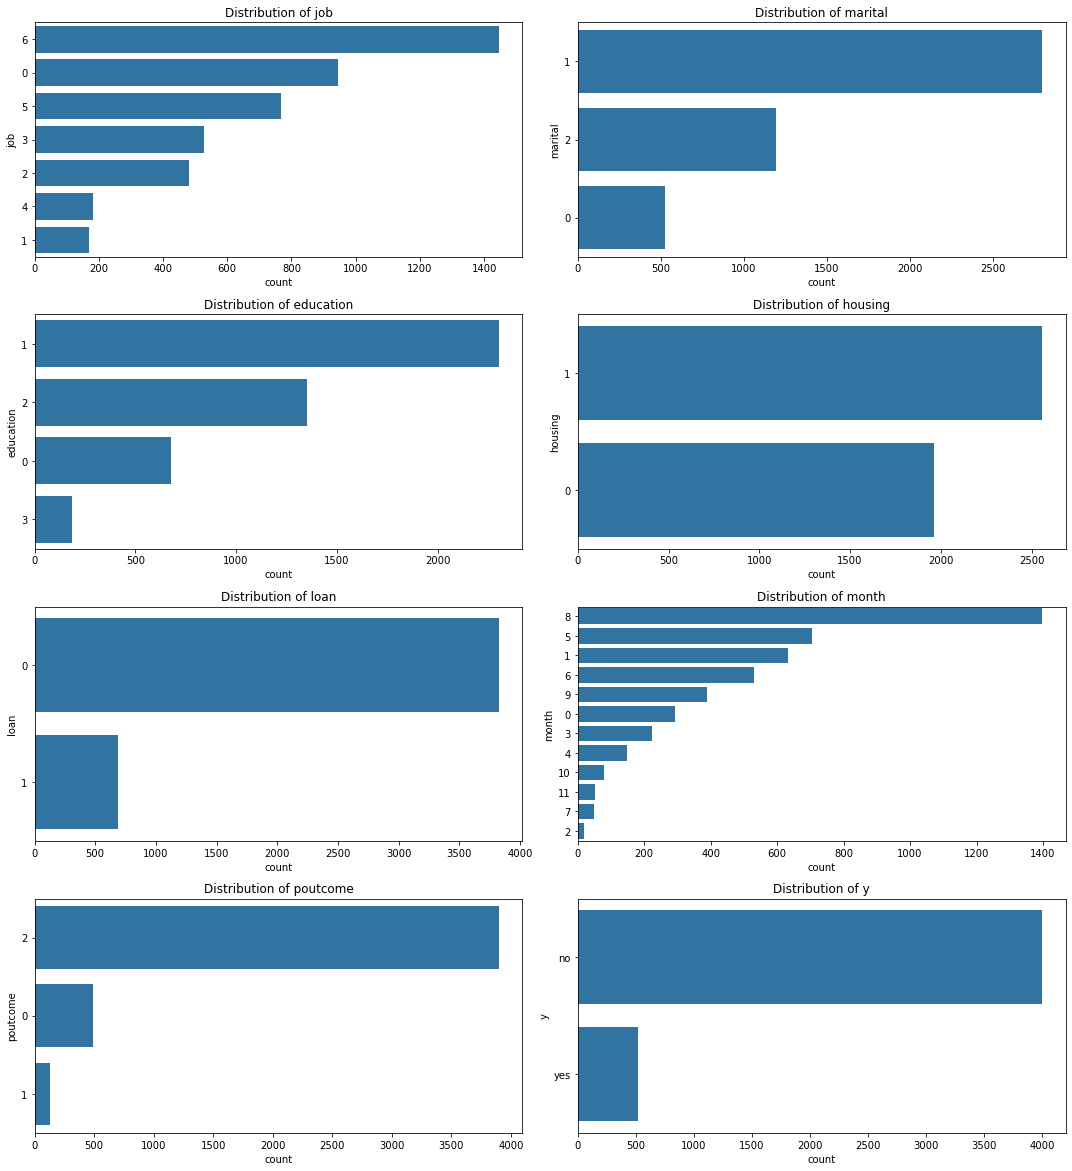

In [47]:
# Summary statistics for categorical features
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'month', 'poutcome', 'y']

# Distribution of categorical features
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## Model Training

In [36]:
# Separate features and target variable
X = df.drop("y", axis=1)
y = df["y"]

In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
clf = DecisionTreeClassifier(random_state=42)  # Hyperparameter tuning can be done here
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [40]:
# Evaluate the model (accuracy, precision, recall, F1-score etc.)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8718
